# Portfolio Rebalancing

## Porfolio

### 1. Install specific library to get the stock price data

In [ ]:
#pip install yfinance plotly

In [ ]:
#pip install mpld3

### 2. Import libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

## I - Load historical stock price data (dividend included)

In [147]:
ticker_list = ['RI.PA', 'SU.PA', 'OR.PA', 'AI.PA', 'MC.PA', 'CAP.PA', 'BN.PA', 'AC.PA', 'SW.PA', 'TTE.PA',  'XWD.TO', '^FCHI', '^GSPC', '^SP500TR', 'LYYA.F', 'GC=F']
data_ticker = yf.download(ticker_list, start='2018-01-01', end='2024-05-10')['Close']
data_ticker.tail(10)

[*********************100%***********************]  16 of 16 completed


,AC.PA,AI.PA,BN.PA,CAP.PA,GC=F,LYYA.F,MC.PA,OR.PA,RI.PA,SU.PA,SW.PA,TTE.PA,XWD.TO,^FCHI,^GSPC,^SP500TR
Date,,,,,,,,,,,,,,,,
2024-04-26,42.279999,185.179993,58.299999,203.100006,2334.800049,311.049988,792.200012,435.649994,142.500000,217.350006,78.650002,69.480003,83.000000,8088.240234,5099.959961,11090.459961
2024-04-29,41.779999,184.399994,58.660000,205.500000,2345.399902,311.410004,779.200012,436.500000,142.149994,216.050003,82.050003,69.250000,83.209999,8065.149902,5116.169922,11126.280273
2024-04-30,41.310001,183.880005,58.660000,197.899994,2291.399902,309.630005,774.400024,439.649994,142.000000,215.100006,81.750000,68.589996,82.660004,7984.930176,5035.689941,10951.660156
2024-05-01,NaN,NaN,NaN,NaN,2299.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.339996,NaN,5018.390137,10914.110352
2024-05-02,40.840000,181.059998,59.459999,199.250000,2299.199951,308.640015,767.000000,436.700012,140.699997,213.500000,80.099998,66.849998,82.639999,7914.649902,5064.200195,11013.910156
2024-05-03,41.049999,180.619995,57.740002,202.600006,2299.000000,311.160004,782.000000,440.899994,141.250000,216.300003,80.750000,66.360001,83.720001,7957.569824,5127.790039,11152.759766
2024-05-06,41.720001,181.899994,58.099998,203.000000,2321.600098,313.079987,781.700012,443.000000,141.300003,219.600006,81.150002,67.260002,84.360001,7996.640137,5180.740234,11268.230469
2024-05-07,41.610001,183.979996,58.720001,205.100006,2315.199951,315.519989,789.400024,444.899994,145.649994,221.500000,81.900002,67.070000,84.889999,8075.680176,5187.700195,11283.959961
2024-05-08,41.470001,186.539993,59.320000,206.600006,2313.600098,315.070007,787.900024,447.049988,148.500000,226.399994,82.650002,67.230003,84.900002,8131.410156,5187.669922,11283.910156


In [185]:
stocks = ['RI.PA', 'SU.PA', 'OR.PA', 'AI.PA', 'MC.PA', 'CAP.PA', 'BN.PA', 'AC.PA', 'SW.PA', 'TTE.PA']
data = data_ticker[stocks]
data.tail(10)

,RI.PA,SU.PA,OR.PA,AI.PA,MC.PA,CAP.PA,BN.PA,AC.PA,SW.PA,TTE.PA
Date,,,,,,,,,,
2024-04-26,142.500000,217.350006,435.649994,185.179993,792.200012,203.100006,58.299999,42.279999,78.650002,69.480003
2024-04-29,142.149994,216.050003,436.500000,184.399994,779.200012,205.500000,58.660000,41.779999,82.050003,69.250000
2024-04-30,142.000000,215.100006,439.649994,183.880005,774.400024,197.899994,58.660000,41.310001,81.750000,68.589996
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,140.699997,213.500000,436.700012,181.059998,767.000000,199.250000,59.459999,40.840000,80.099998,66.849998
2024-05-03,141.250000,216.300003,440.899994,180.619995,782.000000,202.600006,57.740002,41.049999,80.750000,66.360001
2024-05-06,141.300003,219.600006,443.000000,181.899994,781.700012,203.000000,58.099998,41.720001,81.150002,67.260002
2024-05-07,145.649994,221.500000,444.899994,183.979996,789.400024,205.100006,58.720001,41.610001,81.900002,67.070000
2024-05-08,148.500000,226.399994,447.049988,186.539993,787.900024,206.600006,59.320000,41.470001,82.650002,67.230003


In [186]:
# Forward fill missing data for all tickers to handle NaN values due to non-trading days
data_filled = data.fillna(method='ffill')

In [187]:
# Step 3: Calculate daily returns
returns_ticker = data_filled.pct_change().fillna(0)
#returns_ticker[abs(returns_ticker['Close']['OR.PA']- returns_ticker['Adj Close']['OR.PA']) > 0.000001]
returns_ticker

,RI.PA,SU.PA,OR.PA,AI.PA,MC.PA,CAP.PA,BN.PA,AC.PA,SW.PA,TTE.PA
Date,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.007294,0.013425,0.003843,0.007656,0.006009,0.020202,0.006670,-0.003910,-0.003579,0.010855
2018-01-04,0.000381,0.018038,0.009024,0.022792,0.011740,0.003465,0.014835,0.006696,0.001796,0.019759
2018-01-05,0.005333,0.013843,0.013008,0.008357,0.015879,0.011347,0.018308,0.003899,0.008965,0.007266
2018-01-08,0.002653,0.001638,-0.000803,0.011050,-0.016032,-0.000976,-0.006690,0.013936,-0.004443,0.004391
...,...,...,...,...,...,...,...,...,...,...
2024-05-03,0.003909,0.013115,0.009618,-0.002430,0.019557,0.016813,-0.028927,0.005142,0.008115,-0.007330
2024-05-06,0.000354,0.015257,0.004763,0.007087,-0.000384,0.001974,0.006235,0.016322,0.004954,0.013562
2024-05-07,0.030785,0.008652,0.004289,0.011435,0.009850,0.010345,0.010671,-0.002637,0.009242,-0.002825


In [188]:
# Step 4: Calculate expected returns and the covariance matrix
mean_returns_ticker = returns_ticker.mean()
cov_matrix_ticker = returns_ticker.cov()

In [189]:
mean_returns = mean_returns_ticker[stocks]
cov_matrix = cov_matrix_ticker[stocks][:len(stocks)]
cov_matrix

,RI.PA,SU.PA,OR.PA,AI.PA,MC.PA,CAP.PA,BN.PA,AC.PA,SW.PA,TTE.PA
RI.PA,0.000179,0.000102,0.000113,0.000076,0.000136,0.000106,0.000075,0.000116,0.000100,0.000070
SU.PA,0.000102,0.000292,0.000138,0.000138,0.000194,0.000186,0.000076,0.000182,0.000126,0.000137
OR.PA,0.000113,0.000138,0.000211,0.000104,0.000170,0.000119,0.000082,0.000109,0.000081,0.000081
AI.PA,0.000076,0.000138,0.000104,0.000167,0.000132,0.000117,0.000073,0.000106,0.000079,0.000099
MC.PA,0.000136,0.000194,0.000170,0.000132,0.000322,0.000178,0.000076,0.000193,0.000129,0.000141
CAP.PA,0.000106,0.000186,0.000119,0.000117,0.000178,0.000356,0.000068,0.000188,0.000143,0.000129
BN.PA,0.000075,0.000076,0.000082,0.000073,0.000076,0.000068,0.000159,0.000085,0.000077,0.000060
AC.PA,0.000116,0.000182,0.000109,0.000106,0.000193,0.000188,0.000085,0.000467,0.000258,0.000204
SW.PA,0.000100,0.000126,0.000081,0.000079,0.000129,0.000143,0.000077,0.000258,0.000395,0.000162
TTE.PA,0.000070,0.000137,0.000081,0.000099,0.000141,0.000129,0.000060,0.000204,0.000162,0.000342


### Portfolio cumulative return

In [190]:
# Chosen weights for the portfolio
chosen_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Calculate daily portfolio returns
portfolio_returns = returns_ticker.dot(chosen_weights)

# Calculate cumulative returns for the chosen portfolio
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Convert to a DataFrame for plotting
cumulative_returns_df = cumulative_returns.reset_index()
cumulative_returns_df.columns = ['Date', 'Cumulative Returns']

## Graphic of the porfolio performance above time

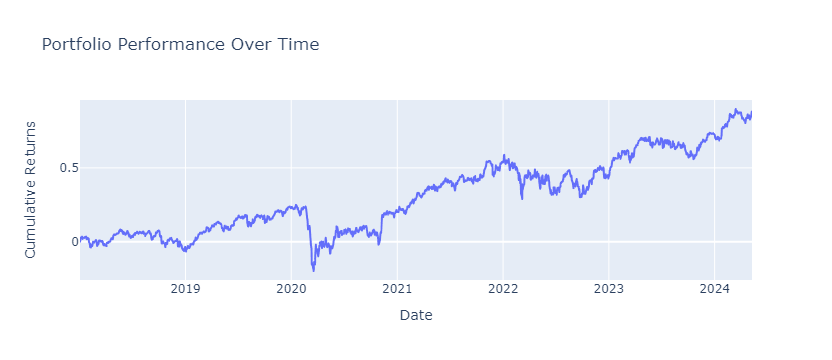

In [191]:
# Plot the performance of the portfolio over time
fig = px.line(cumulative_returns_df, x='Date', y='Cumulative Returns', title='Portfolio Performance Over Time')
fig.show()

# Compararison with indexes

In [192]:
index_returns = data_ticker['^GSPC']

In [193]:
#index_returns_cleaned = index_returns.fillna(0)
# Calculate daily returns for the index 'XWD.TO'
index_returns_cleaned = index_returns.pct_change().fillna(0)

# Calculate cumulative returns for the index
index_cumulative_returns = (1 + index_returns_cleaned).cumprod() - 1

index_series = index_cumulative_returns * 100

# Convert to a DataFrame for plotting
index_series_df = index_series.reset_index()
index_series_df.columns = ['Date', '^GSPC']

In [198]:
cumulative_returns_df.index

RangeIndex(start=0, stop=1643, step=1)

In [197]:
index_cumulative_returns.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2024-04-26', '2024-04-29', '2024-04-30', '2024-05-01',
               '2024-05-02', '2024-05-03', '2024-05-06', '2024-05-07',
               '2024-05-08', '2024-05-09'],
              dtype='datetime64[ns]', name='Date', length=1643, freq=None)

In [199]:
# Convert the RangeIndex of cumulative_returns_df to a DatetimeIndex
cumulative_returns_df.index = data_ticker.index

In [200]:
cumulative_returns_df

,Date,Cumulative Returns
Date,,
2018-01-02,2018-01-02,0.000000
2018-01-03,2018-01-03,0.006846
2018-01-04,2018-01-04,0.017773
2018-01-05,2018-01-05,0.028583
2018-01-08,2018-01-08,0.029069
...,...,...
2024-05-03,2024-05-03,0.834198
2024-05-06,2024-05-06,0.847060
2024-05-07,2024-05-07,0.863649


In [202]:
cumulative_returns_df = cumulative_returns_df['Cumulative Returns']
cumulative_returns_df

Date
2018-01-02    0.000000
2018-01-03    0.006846
2018-01-04    0.017773
2018-01-05    0.028583
2018-01-08    0.029069
                ...   
2024-05-03    0.834198
2024-05-06    0.847060
2024-05-07    0.863649
2024-05-08    0.879349
2024-05-09    0.881960
Name: Cumulative Returns, Length: 1643, dtype: float64

In [203]:
index_cumulative_returns

Date
2018-01-02    0.000000
2018-01-03    0.006399
2018-01-04    0.010453
2018-01-05    0.017561
2018-01-08    0.019252
                ...   
2024-05-03    0.902133
2024-05-06    0.921775
2024-05-07    0.924357
2024-05-08    0.924345
2024-05-09    0.934142
Name: ^GSPC, Length: 1643, dtype: float64

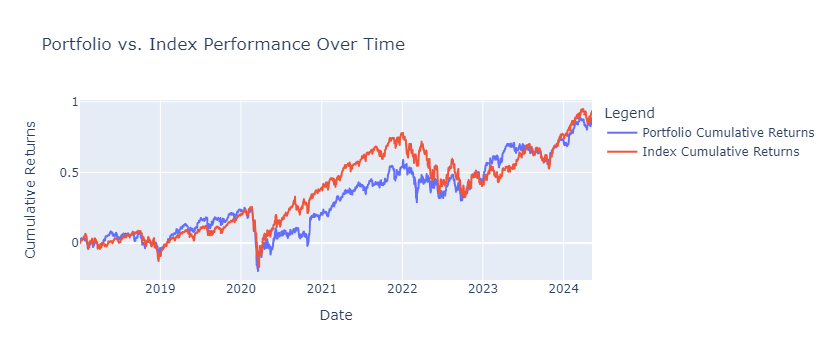

In [204]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': cumulative_returns_df.index,
    'Portfolio Cumulative Returns': cumulative_returns_df.values,
    'Index Cumulative Returns': index_cumulative_returns.values
})

# Plot the performance of the portfolio and the index over time
fig = px.line(plot_df, x='Date', y=['Portfolio Cumulative Returns', 'Index Cumulative Returns'],
              title='Portfolio vs. Index Performance Over Time',
              labels={'value': 'Cumulative Returns', 'variable': 'Legend'})

fig.show()

## Monitor the weight of each stock in portfolio above time

In [273]:
# Initial weights
chosen_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Calculate daily portfolio returns
portfolio_returns = returns_ticker.dot(chosen_weights)

# Calculate cumulative returns for the portfolio and each stock
cumulative_returns = (1 + returns_ticker).cumprod()

# Calculate the daily portfolio value
# Initial portfolio value is assumed to be 1
initial_portfolio_value = 1
portfolio_value = initial_portfolio_value * (1 + portfolio_returns).cumprod()

# Calculate the daily value of each stock in the portfolio
# Each stock's initial value is its weight in the portfolio
stock_values = cumulative_returns.mul(chosen_weights, axis=1)

# Calculate the daily portfolio weights
daily_weights = stock_values.div(portfolio_value, axis=0)

# Normaliser les poids quotidiens pour que leur somme soit égale à 1 chaque jour
normalized_weights = daily_weights.div(daily_weights.sum(axis=1), axis=0)

# Convertir en DataFrame pour l'analyse
normalized_weights_df = normalized_weights.reset_index()

# Display the first few rows of the resulting DataFrame
print(normalized_weights_df.tail())

           Date     RI.PA     SU.PA     OR.PA     AI.PA     MC.PA    CAP.PA  \
1638 2024-05-03  0.059625  0.169844  0.133084  0.114988  0.178183  0.112518   
1639 2024-05-06  0.059249  0.171289  0.132829  0.115032  0.176930  0.111990   
1640 2024-05-07  0.060545  0.171277  0.132245  0.115342  0.177127  0.112170   
1641 2024-05-08  0.061198  0.173558  0.131740  0.115939  0.175269  0.112017   
1642 2024-05-09  0.061148  0.175390  0.133185  0.115715  0.174779  0.110955   

         BN.PA     AC.PA     SW.PA    TTE.PA  
1638  0.046029  0.051909  0.054608  0.079213  
1639  0.046008  0.052405  0.054514  0.079754  
1640  0.046097  0.051815  0.054542  0.078841  
1641  0.046167  0.051196  0.054567  0.078348  
1642  0.045943  0.049752  0.053813  0.079320  


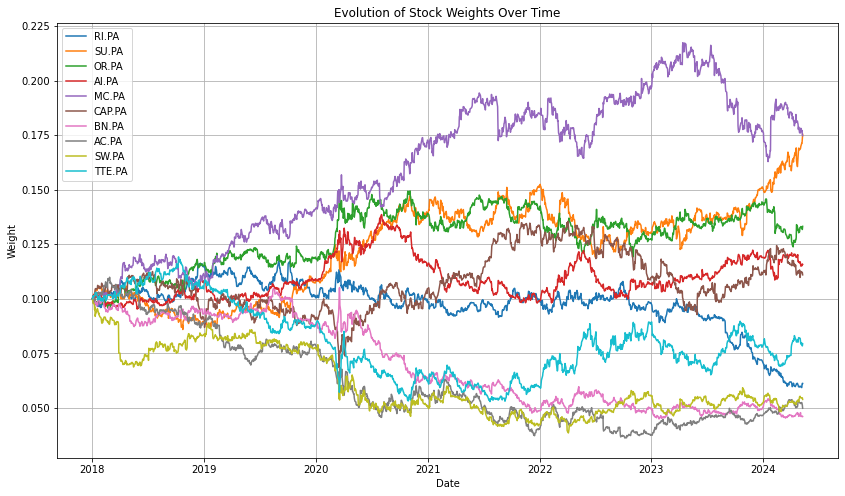

In [275]:
# Plot the evolution of the weight of each stock over time
plt.figure(figsize=(14, 8))

for column in daily_weights.columns:
    plt.plot(normalized_weights_df['Date'], normalized_weights_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Evolution of Stock Weights Over Time')
plt.legend(loc='best')
plt.grid(True)
plt.show()

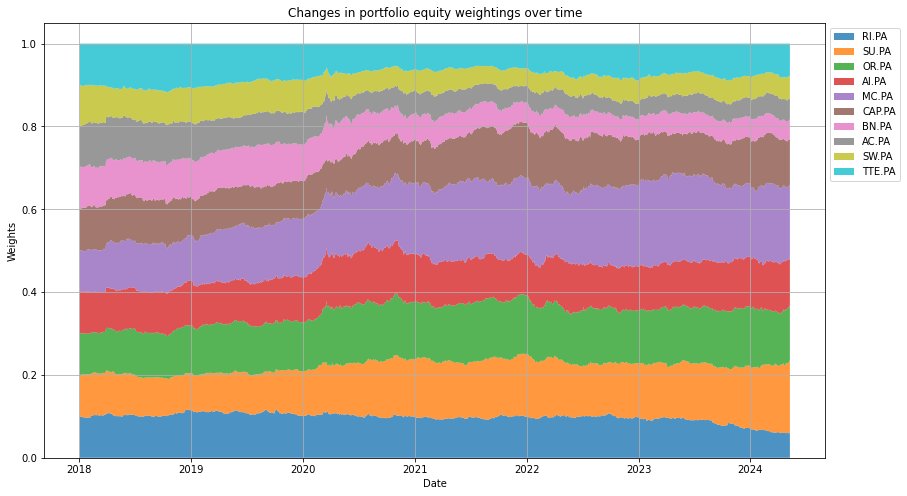

In [277]:
# Create stacked area chart
plt.figure(figsize=(14, 8))

plt.stackplot(normalized_weights_df['Date'], normalized_weights_df.iloc[:, 1:].T, labels=normalized_weights_df.columns[1:], alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Weights')
plt.title('Changes in portfolio equity weightings over time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Graphic of the portfolio yearly rebalanced compared with initial porfolio and indexes

## Graphic of the portfolio semesterly rebalanced compared with initial porfolio and indexes

## Graphic of the portfolio quaterly rebalanced compared with initial porfolio and indexes

## Graphic of the portfolio monthly rebalanced compared with initial porfolio and indexes

## Graphic of the portfolio yearly rebalanced compared with initial porfolio and indexes